

1.   SVR allows to invest wisely and profitably.

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Google_2018.csv")

In [ ]:
df.shape

In [3]:
df=df[['Date','Close']]

In [4]:
actual_price= df.tail(1)
actual_price

,Date,Close
1007,2021-12-31,144.679504


In [ ]:
#prepare the data for training the SVR models
df=df.head(len(df)-1)

In [ ]:
#create empty lists to store independent and dependent data
days=list()
close_price=list()

In [ ]:
#Get the dates and close prices
df_days=df.loc[:,'Date']
df_close=df.loc[:,'Close']
df_days

In [ ]:
#Cleate the independent data set
for day in df_days:
  days.append(day)

In [ ]:
#create the dependent data set
for price in df_close:
  close_price.append(float(price))

In [ ]:
print(days)
print(close_price)

In [ ]:
#Create the 3 support vector regression models

#Create and train a SVR model using a linear kernel
lin_svr=SVR(kernel='linear',C=1000.0)
lin_svr.fit(days,close_price)

#Create and train a SVR model using a polynomial kernel
poly_svr=SVR(kernel='poly',C=1000.0, degree=2)
poly_svr.fit(days,close_price)

#Create and train a SVR model using a rbf kernel
rbf_svr=SVR(kernel='rbf',C=1000.0, gamma=0.15)
rbf_svr.fit(days,close_price)

In [ ]:
#plot the model on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(days,close_price,color='red',label='Data')
plt.plot(days,rbf_svr.predict(days),color='green',label='RBF Model')
plt.plot(days,poly_svr.predict(days),color='orange',label='Polynomial Model')
plt.plot(days,lin_svr.predict(days),color='blue',label='Linear Model')
plt.legend()
plt.plot()

In [ ]:
day=[[31]]
print('The RBF SVR predict', rbf_svr.predict(day))
print('The Linear SVR predict', lin_svr.predict(day))
print('The Polynomial SVR predict', poly_svr.predict(day))

# 2.1 SVR

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
# Making date as index column

df.index = pd.to_datetime(df['Date'])

# drop the column named “Date”

df = df.drop(['Date'], axis='columns')
df

In [9]:
# Target variables

y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

print(y)

[1 1 1 ... 0 0 0]


In [10]:
  X=df[['Close']]

In [11]:
split = int(0.9*len(df))

# Train data set

X_train = X[:split]

y_train = y[:split]

# Test data set

X_test = X[split:]

y_test = y[split:]

In [13]:
# Support vector classifier
from sklearn.svm import SVC
model = SVC().fit(X_train, y_train)

In [14]:
df['sig'] = model.predict(X)

In [15]:
df

,Close,sig
Date,,
2018-01-02,53.250000,1
2018-01-03,54.124001,1
2018-01-04,54.320000,1
2018-01-05,55.111500,1
2018-01-08,55.347000,1
...,...,...
2021-12-27,148.063995,1
2021-12-28,146.447998,1
2021-12-29,146.504501,1


 # Attept 3

In [4]:
df=df[['Date','Close']]
# Making date as index column

df.index = pd.to_datetime(df['Date'])

# drop the column named “Date”

df = df.drop(['Date'], axis='columns')

In [5]:
future_days=5

In [6]:
#Create a new column
df[str(future_days)+'_Day_Price_Forecast']=df[['Close']].shift(-future_days)
df[['Close',str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
Date,,
2018-01-02,53.250000,55.313000
2018-01-03,54.124001,55.130501
2018-01-04,54.320000,55.276001
2018-01-05,55.111500,56.112999
2018-01-08,55.347000,56.088001
...,...,...
2021-12-27,148.063995,NaN
2021-12-28,146.447998,NaN
2021-12-29,146.504501,NaN


In [7]:
X=np.array(df[['Close']])
X=X[:df.shape[0]-future_days]

In [8]:
y=np.array(df[str(future_days)+'_Day_Price_Forecast'])
y=y[:-future_days]

In [9]:
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [10]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.00001)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [11]:
svr_rbf_confidence= svr_rbf.score(X_test,y_test)
print('svr_rbf accuracy:',svr_rbf_confidence)

svr_rbf accuracy: 0.993159122272831


In [12]:
svm_prediction=svr_rbf.predict(X_test)

In [13]:
print(svm_prediction)
print('\n')
print(y_test)

[ 87.52640494 139.87950977  62.11851969  54.965959   116.46868516
  64.22223928  89.91011029  73.04181824 146.87222217  67.60175164
  53.3907856   60.17829662 140.31124445  55.20687628  73.42303656
  58.0006453   57.32745485  59.44186567  74.84674127  96.05606255
 146.78850191  71.5444735   56.14235575  54.50910371  64.9046674
  58.42753518  53.15879479 142.93654252 145.26827136  70.79150887
  63.52911775  76.10296382 144.16563747  89.93009669  52.1551202
 116.18447375  58.82606003  92.29653786  72.02943704  75.91919007
  78.37530645  68.23542667  59.04678307  60.35437299  72.16834089
  52.62339924  60.64149704  54.28381409  80.13726816  54.4462659
  72.18507403 103.06892087  57.07990231  58.7273896   60.60267539
  67.67531985  90.76693334  58.63567966  57.47378139  55.37707298
  53.3335106   56.20791904  65.47839041  76.45582467  76.08514356
  89.33463243  53.04431821  59.63902989 145.72066267  72.43861039
  64.97741389  80.28334243  54.7915095  107.63312068  67.81694303
  58.55488875

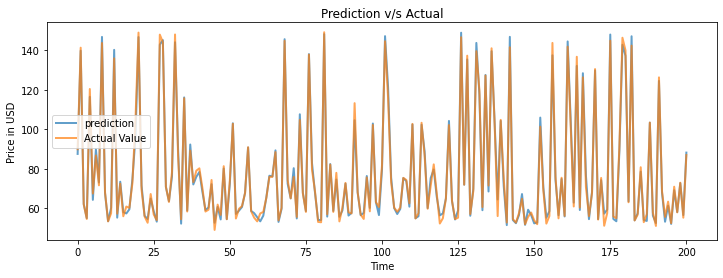

In [14]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction,label='prediction',lw=2,alpha=0.7)
plt.plot(y_test,label='Actual Value', lw=2, alpha=0.7)
plt.title('Prediction v/s Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.show()